#Applied Machine Learning
## Mini Porject 1

Author Mustafa Javed

Credits: Parts of this code has been given by Prof Rabbany and the teaching Stadd during tutorials for COMP 551 with due permission to reuse the code

## Imports and Preprocessing

In [ ]:
from scipy.io import arff
import urllib.request
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

npseed = 4321

## Task 1: Acquire, preprocess, and analyze the data

In [ ]:
# Hepatits Dataset
hepatitis_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', sep=",")

hepatitis_df.columns = ['CLASS', 'AGE' , 'SEX' , 'STEROID' , 'ANTIVIRALS' , 'FATIGUE' ,'MALAISE' , 'ANOREXIA' ,
                        'LIVER BIG' , 'LIVER FIRM' ,'SPLEEN PALPABLE' , 'SPIDERS' , 'ASCITES' , 'VARICES' ,'BILIRUB',
                        'ALK PHOSPHATE' , 'SGOT' , 'ALBUMIN' ,'PROTIME' , 'HISTOLOGY']

clean_hepatitis_df =  hepatitis_df.loc[hepatitis_df.ne('?').all(1)]
clean_hepatitis_df.reset_index(drop=True, inplace=True)
clean_hepatitis_df = clean_hepatitis_df.astype(float)

In [ ]:
## Diabetic dataset
res = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff')
data, _ = arff.loadarff(StringIO(res.read().decode('utf-8')))

diabetic_df = pd.DataFrame(data)

diabetic_df.columns = ["quality", "pre_screening", "MA_2", "MA_3", "MA_4", "MA_5", "MA_6", "MA_7",
         "exudates_8", "exudates_9", "exudates_10", "exudates_11", "exudates_12",
         "exudates_13", "exudates_14", "exudates_15", "distance", "diameter",
         "AM_FM", "Class"]

clean_diabetic_df = diabetic_df.loc[diabetic_df.ne('?').all(1)]
clean_diabetic_df.reset_index(drop=True, inplace=True)
clean_diabetic_df = clean_diabetic_df.astype(float) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce93977dd0>,
      dtype=object)

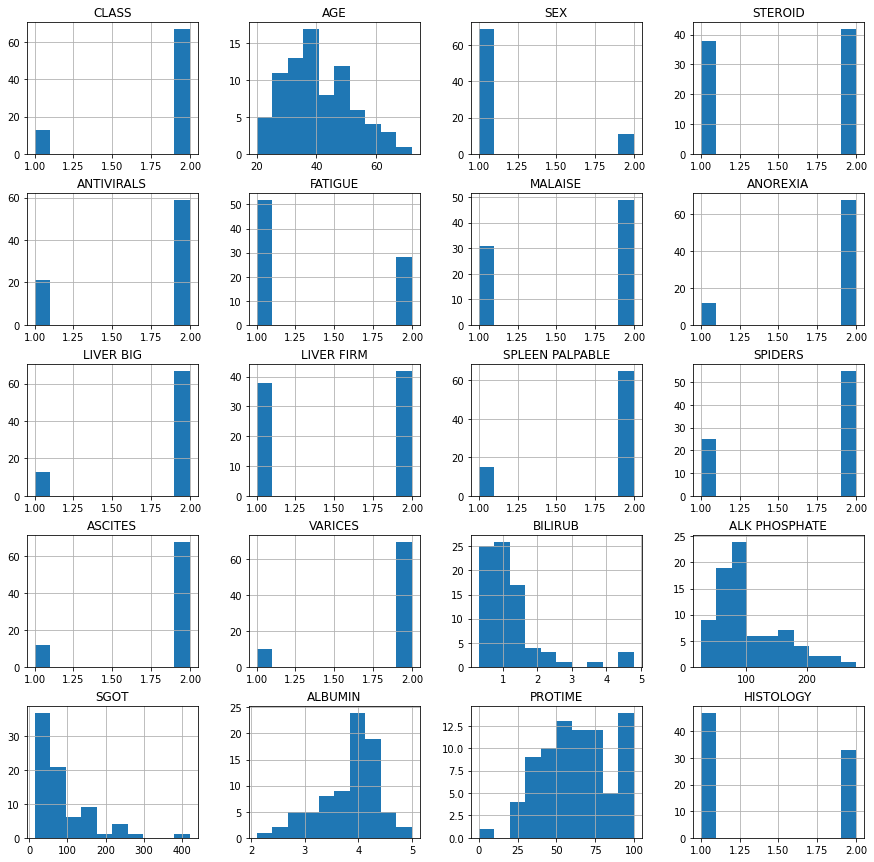

In [ ]:
#print(clean_hepatitis_df)
clean_hepatitis_df.hist(figsize = (15,15)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce8a344fd0>,
      dtype=object)

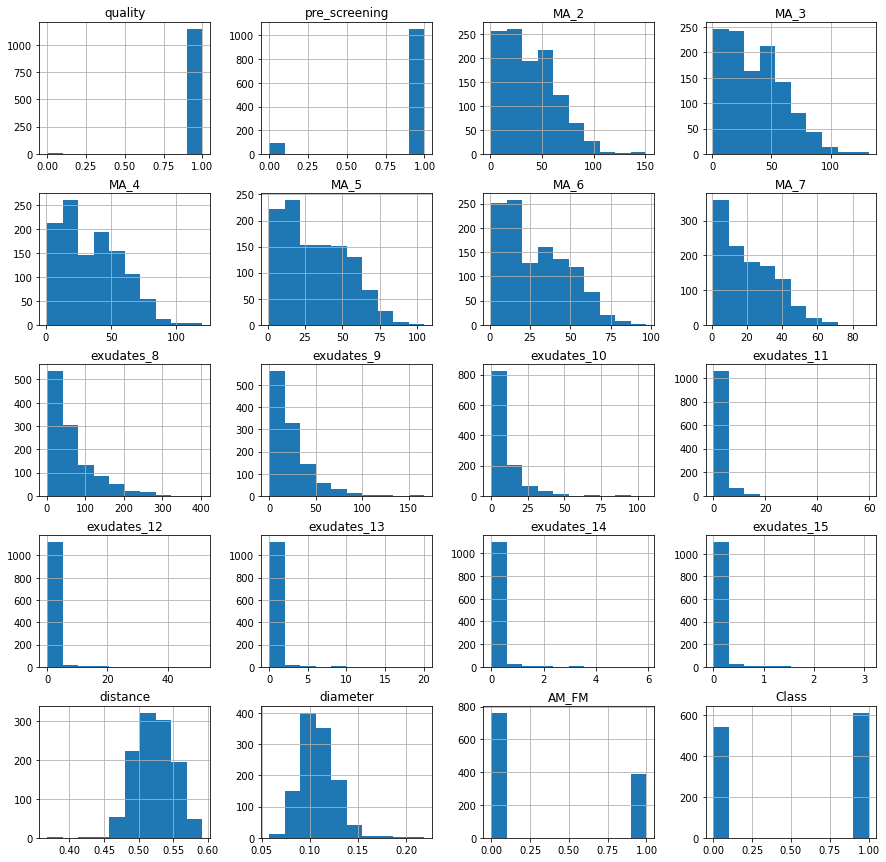

In [ ]:
#print(clean_diabetic_df)
clean_diabetic_df.hist( figsize= (15,15))

##KNN 

In [ ]:
class KNN_model():

  eculidean = lambda X1, X2 : X1.sub(X2).pow(2).sum(axis = 1).pow(0.5)
  manhattan = lambda X1, X2 : X1.sub(X2).abs().sum(axis=1)
  cosine =    lambda X1, X2 : X1.apply(lambda row: X2.dot(row) / np.linalg.norm(X2) / np.linalg.norm(row), axis=1)

  def __init__(self, K=1, dist= "eculidean"):
        self.K = K
        if dist == "manhatten":
          self.dist_fn = KNN_model.manhattan
        elif dist == 'eculidean':
          self.dist_fn = KNN_model.eculidean
        elif dist == 'cosine':
          self.dist_fn = KNN_model.cosine
        
  def fit(self, X: pd.core.frame.DataFrame, Y: pd.core.frame.DataFrame):
    self.X  = X
    self.Y = Y

  def predict(self, X_test):
    
    predictions = {}  # for an instance in X_tests, store {index : class with highest probalility} 
    knns = {}         # for an instance in X_tests, store {index : knns}
    probabilities = {}   # for an instance in X_tests, store {index : probablity of each classes}
    
    for index, X in X_test.iterrows():
    
      distances = self.dist_fn(self.X, X)                 # df stores distance of X from each instace in train data
      sorted_nieghbours = distances.sort_values()         # the train instances are sorted based on their distances
      K_neighbours = sorted_nieghbours.index[:self.K]     # choose the K nearest train instances
      K_neighbours_labels = self.Y.loc[K_neighbours]      # Get the class of the K nearest train instances
      prob = (K_neighbours_labels.value_counts()/self.K)  # Similar to np.bincount, lists the probabilties of K labels in desc order
      prediction = prob.index[0]                          # The first instance would have the highest prob because of desc order

      predictions[index] = prediction
      knns[index] = K_neighbours_labels
      probabilities[index] = prob
      #prediction = K_neighbours_labels.mode().iloc[0]

    return  pd.Series(predictions) , pd.DataFrame.from_dict(knns,orient = 'index'), pd.DataFrame.from_dict(probabilities,orient = 'index')

def knn_accurancy(target_labels, true_labels):
  assert len(target_labels) == len(true_labels), "target and true labels must have equal len"
  difference = target_labels.compare(true_labels)
  return 1- len(difference)/len(target_labels)

## Testing KNN

In [ ]:
x, y = clean_hepatitis_df.iloc[:,1:], clean_hepatitis_df.iloc[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]

hepatitis_knn = KNN_model(K=3)
hepatitis_knn.fit(x_train,y_train)
y_pred, knns, prob = hepatitis_knn.predict(x_test)

accuracy = knn_accurancy(y_pred,y_test)
print("Accuracy = {:.2f} %".format(accuracy*100 ))


Accuracy = 65.00 %


In [ ]:
x, y = clean_diabetic_df.iloc[:,:-1], clean_diabetic_df.iloc[:,-1]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]

diabetic_knn = KNN_model(K = 15)
diabetic_knn.fit(x_train,y_train)
y_pred, knns, prob = diabetic_knn.predict(x_test)

accuracy = knn_accurancy(y_pred,y_test)
print("Accuracy = {:.2f} %".format( accuracy*100 ))

Accuracy = 68.64 %


## Decision Tree

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            

def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

## Testing Decision Tree

In [ ]:
clean_hepatitis_np = clean_hepatitis_df.to_numpy()

x, y = clean_hepatitis_np[:,1:], clean_hepatitis_np.astype(int)[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

#train-test split

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

tree = DecisionTree(max_depth=20)

probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)

accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')


accuracy is 85.0.


In [ ]:
clean_diabetic_np = clean_diabetic_df.to_numpy()


x, y = clean_diabetic_np[:,:-1], clean_diabetic_np.astype(int)[:,-1] 

np.random.seed(npseed)

(num_instances, num_features), num_classes = x.shape, y.shape

inds = np.random.permutation(num_instances)

#train-test split
num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

tree = DecisionTree(max_depth=20)

probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)

accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 63.1.


## Task 3: Run experiments

### KNN

For different K from 1 to 15

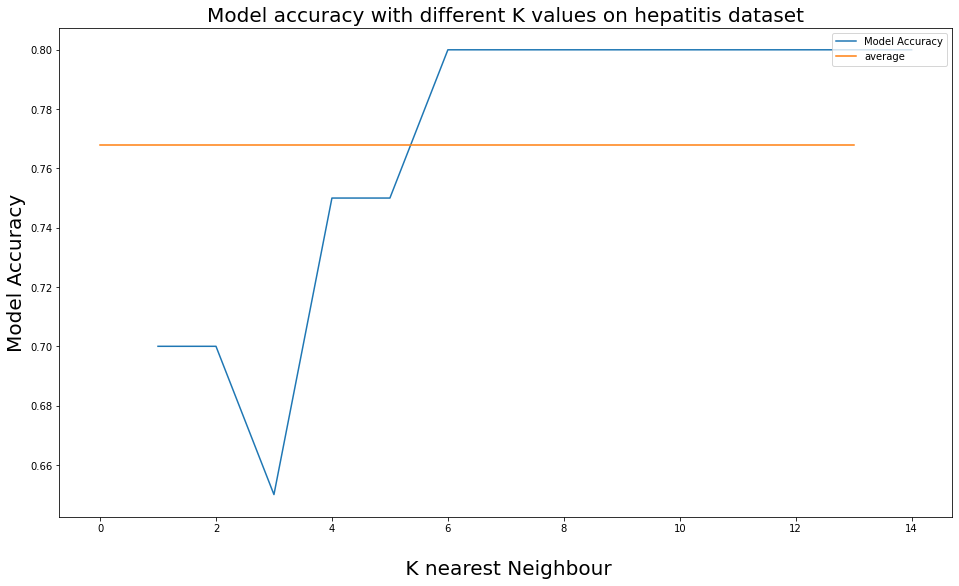

Model is optimum for K = 6 with accuracy = 80.00 %
Average accuracy = 76.79


In [ ]:
x, y = clean_hepatitis_df.iloc[:,1:], clean_hepatitis_df.iloc[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)
inds = np.random.permutation(num_instances)

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]

K_accurancy = {}

for i in range(1,15):

  hepatitis_knn = KNN_model(K=i)
  hepatitis_knn.fit(x_train,y_train)
  y_pred, knns, prob = hepatitis_knn.predict(x_test)

  accuracy = knn_accurancy(y_pred,y_test)
  K_accurancy[i] = accuracy

plt.figure()

x_data = list(K_accurancy.keys())
y_data = list(K_accurancy.values())
y_mean = [np.mean(y_data) for i in x_data]

plt.plot( x_data, y_data, label = 'Model Accuracy')
plt.plot(y_mean, label = 'average')

plt.title("Model accuracy with different K values on hepatitis dataset", fontsize=20)
plt.xlabel(" \n K nearest Neighbour", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.rcParams['figure.figsize'] = [16, 9]

plt.show()

print(f"Model is optimum for K = {np.argmax(y_data)+1} with accuracy = {100*max(y_data):.2f} %")
print(f"Average accuracy = {100*np.mean(y_data):.2f}")


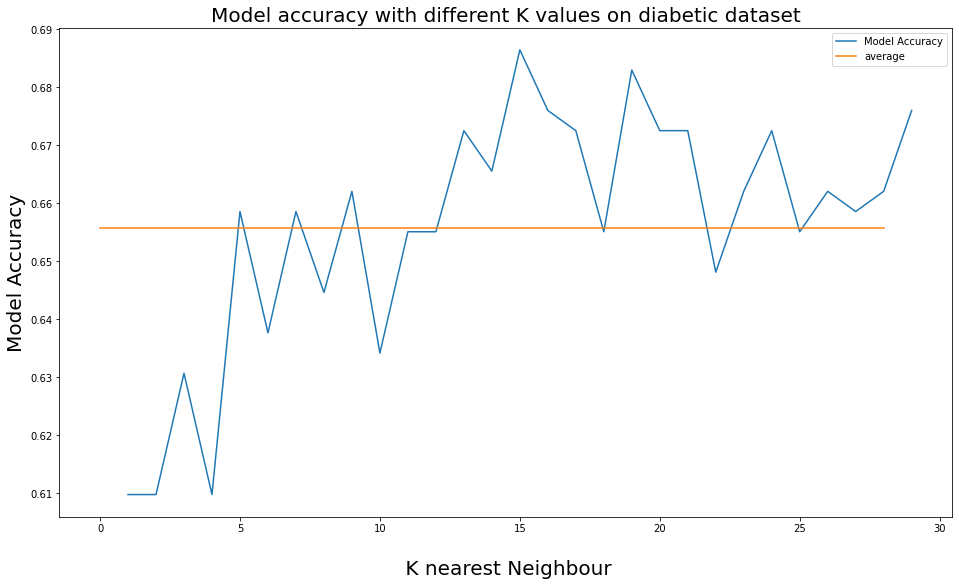

Model is optimum for K = 15 with accuracy = 68.64 %
Average accuracy = 65.58


In [ ]:
x, y = clean_diabetic_df.iloc[:,:-1], clean_diabetic_df.iloc[:,-1]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)
inds = np.random.permutation(num_instances)

num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]

K_accurancy = {}

for i in range(1,30):
  
  diabetic_knn = KNN_model(K=i)
  diabetic_knn.fit(x_train,y_train)
  y_pred, knns, prob = diabetic_knn.predict(x_test)

  accuracy = knn_accurancy(y_pred,y_test)
  K_accurancy[i] = accuracy

plt.figure()

x_data = list(K_accurancy.keys())
y_data = list(K_accurancy.values())
y_mean = [np.mean(y_data) for i in x_data]

plt.plot( x_data, y_data, label = 'Model Accuracy')
plt.plot(y_mean, label = 'average')

plt.title("Model accuracy with different K values on diabetic dataset", fontsize=20)
plt.xlabel(" \n K nearest Neighbour", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.rcParams['figure.figsize'] = [16, 9]

plt.show()

print(f"Model is optimum for K = {np.argmax(y_data)+1} with accuracy = {100*max(y_data):.2f} %")
print(f"Average accuracy = {100*np.mean(y_data):.2f}")




###For different distance functions

In [ ]:
x, y = clean_hepatitis_df.iloc[:,1:], clean_hepatitis_df.iloc[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)
inds = np.random.permutation(num_instances)

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]


for dist in ["manhatten", 'eculidean', 'cosine' ]:

  hepatitis_knn = KNN_model(K=6,dist=dist)
  hepatitis_knn.fit(x_train,y_train)
  y_pred, knns, prob = hepatitis_knn.predict(x_test)

  accuracy = knn_accurancy(y_pred,y_test)
  print("Accuracy of KNN on hepatitis dataset with dist fn = {} is {:.2f} %".format(dist, accuracy*100 ))

print("") 

x, y = clean_diabetic_df.iloc[:,:-1], clean_diabetic_df.iloc[:,-1]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]


for dist in ["manhatten", 'eculidean', 'cosine' ]:   

  diabetic_knn = KNN_model(K=15,dist=dist)
  diabetic_knn .fit(x_train,y_train)
  y_pred, knns, prob = diabetic_knn .predict(x_test)

  accuracy = knn_accurancy(y_pred,y_test)
  print("Accuracy of KNN on diabetic dataset with dist fn = {} is {:.2f} %".format(dist, accuracy*100 ))


Accuracy of KNN on hepatitis dataset with dist fn = manhatten is 80.00 %
Accuracy of KNN on hepatitis dataset with dist fn = eculidean is 80.00 %
Accuracy of KNN on hepatitis dataset with dist fn = cosine is 80.00 %

Accuracy of KNN on diabetic dataset with dist fn = manhatten is 67.94 %
Accuracy of KNN on diabetic dataset with dist fn = eculidean is 68.64 %
Accuracy of KNN on diabetic dataset with dist fn = cosine is 48.78 %


# Decision Tree



Different maximum tree depth values

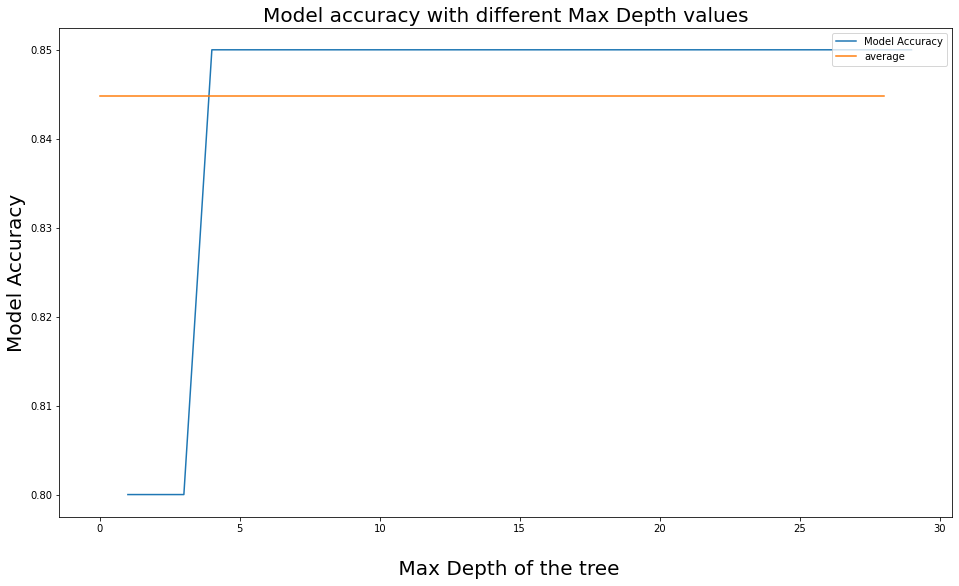

Model is optimum for Max Depth = 4 with accuracy = 85.00 %
Average accuracy = 84.48


In [ ]:
clean_hepatitis_np = clean_hepatitis_df.to_numpy()

x, y = clean_hepatitis_np[:,1:], clean_hepatitis_np.astype(int)[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

#train-test split

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

DT_accurancy = {}

max_depth_values = range(1,30)

for i in max_depth_values:

  tree = DecisionTree(max_depth=i)

  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)

  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  DT_accurancy[i] = accuracy

  #print("Accuracy with max depth = {} is {:.2f} %".format(i, accuracy*100 ))

plt.figure()

x_data = list(DT_accurancy.keys())
y_data = list(DT_accurancy.values())
y_mean = [np.mean(y_data) for i in x_data]

plt.plot( x_data, y_data, label = 'Model Accuracy')
plt.plot(y_mean, label = 'average')

plt.title("Model accuracy with different Max Depth values", fontsize=20)
plt.xlabel(" \n Max Depth of the tree", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.rcParams['figure.figsize'] = [16, 9]

plt.show()

print(f"Model is optimum for Max Depth = {np.argmax(y_data)+1} with accuracy = {100*max(y_data):.2f} %")
print(f"Average accuracy = {100*np.mean(y_data):.2f}")

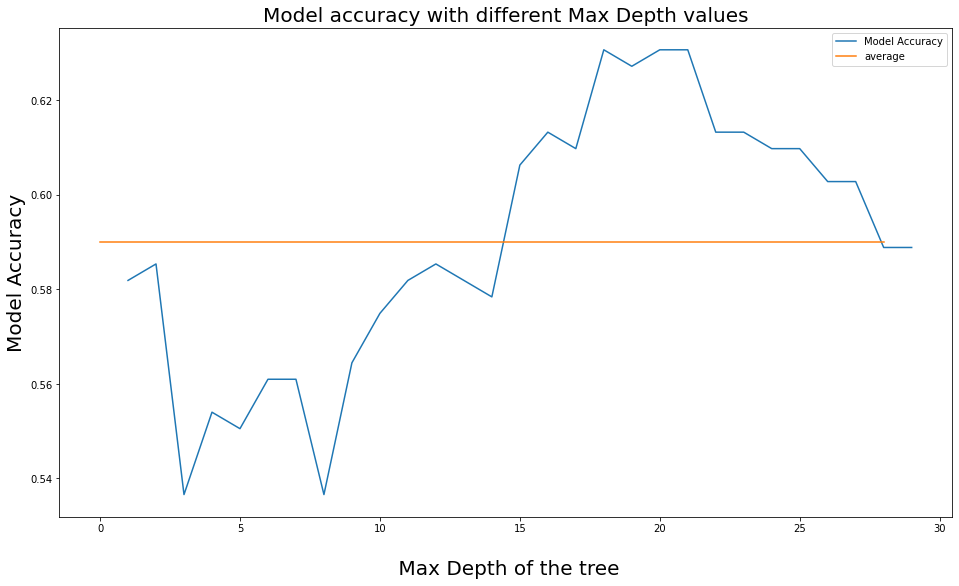

Model is optimum for Max Depth = 18 with accuracy = 63.07 %
Average accuracy = 59.01


In [ ]:
clean_diabetic_np = clean_diabetic_df.to_numpy()

x, y = clean_diabetic_np[:,:-1], clean_diabetic_np.astype(int)[:,-1] 

np.random.seed(npseed)
(num_instances, num_features), num_classes = x.shape, y.shape
inds = np.random.permutation(num_instances)

#train-test split
num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

DT_accurancy = {}

max_depth_values = range(1,30)

for i in max_depth_values:

  tree = DecisionTree(max_depth=i)

  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)

  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

  DT_accurancy[i] = accuracy

  #print("Accuracy with max depth = {} is {:.2f} %".format(i, accuracy*100 ))

plt.figure()

x_data = list(DT_accurancy.keys())
y_data = list(DT_accurancy.values())
y_mean = [np.mean(y_data) for i in x_data]

plt.plot( x_data, y_data, label = 'Model Accuracy')
plt.plot(y_mean, label = 'average')

plt.title("Model accuracy with different Max Depth values", fontsize=20)
plt.xlabel(" \n Max Depth of the tree", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.rcParams['figure.figsize'] = [16, 9]

plt.show()

print(f"Model is optimum for Max Depth = {np.argmax(y_data)+1} with accuracy = {100*max(y_data):.2f} %")
print(f"Average accuracy = {100*np.mean(y_data):.2f}")

Different cost functions while max_depth = 4

In [ ]:
clean_hepatitis_np = clean_hepatitis_df.to_numpy()

x, y = clean_hepatitis_np[:,1:], clean_hepatitis_np.astype(int)[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

#train-test split

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

DT_accurancy = {}

cost_functions = [cost_misclassification, cost_entropy, cost_gini_index]

for cost in cost_functions:

  tree = DecisionTree(max_depth=4, cost_fn = cost)

  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)

  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

  DT_accurancy[i] = accuracy

  print("Accuracy with cost fn {} is {:.2f} %".format(cost.__name__, accuracy*100 ))


clean_diabetic_np = clean_diabetic_df.to_numpy()
x, y = clean_diabetic_np[:,:-1], clean_diabetic_np.astype(int)[:,-1] 

np.random.seed(npseed)
(num_instances, num_features), num_classes = x.shape, y.shape
inds = np.random.permutation(num_instances)

#train-test split
num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

DT_accurancy = {}

for cost in cost_functions:

  tree = DecisionTree(max_depth=4, cost_fn = cost)
  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)

  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  DT_accurancy[i] = accuracy

  print("Accuracy with cost fn {} is {:.2f} %".format(cost.__name__, accuracy*100 ))


Accuracy with cost fn cost_misclassification is 85.00 %
Accuracy with cost fn cost_entropy is 85.00 %
Accuracy with cost fn cost_gini_index is 80.00 %
Accuracy with cost fn cost_misclassification is 55.40 %
Accuracy with cost fn cost_entropy is 64.81 %
Accuracy with cost fn cost_gini_index is 61.67 %


## **3.5** Decision Boundaries

### Decison Boundries for KNN on Hepatits dataset

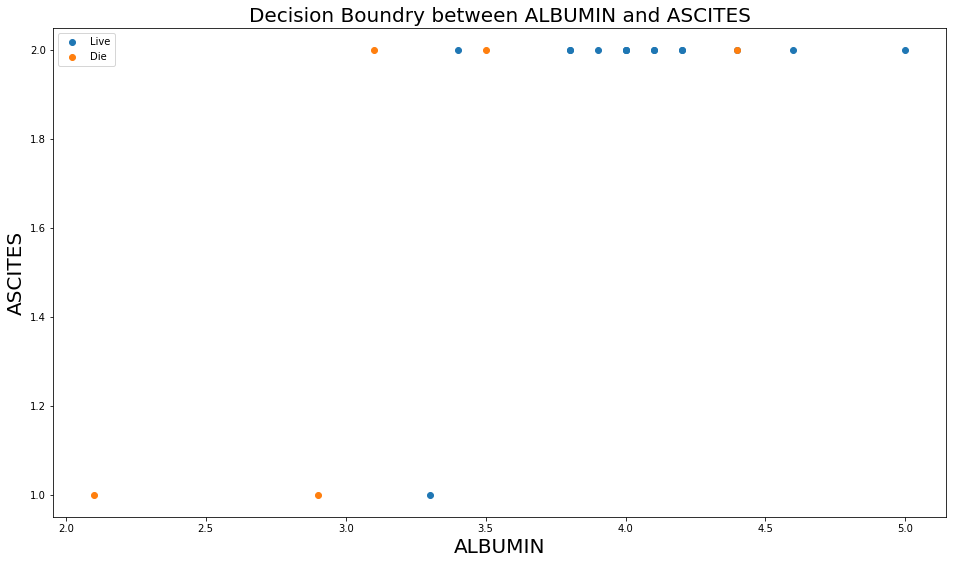

In [ ]:
x, y = clean_hepatitis_df.iloc[:,1:], clean_hepatitis_df.iloc[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]

hepatitis_knn = KNN_model(K=3)

hepatitis_knn.fit(x_train,y_train)

y_pred, knns, prob = hepatitis_knn.predict(x_test)


C1_x_scatter = x_test.loc[y_pred.eq(2)]['ALBUMIN']
C1_y_scatter = x_test.loc[y_pred.eq(2)]['ASCITES']

C0_x_scatter = x_test.loc[y_pred.eq(1)]['ALBUMIN']
C0_y_scatter = x_test.loc[y_pred.eq(1)]['ASCITES']

plt.figure()

plt.scatter(C1_x_scatter, C1_y_scatter, label = "Live" ,marker='o', alpha=1)
plt.scatter(C0_x_scatter, C0_y_scatter, label = "Die" ,marker='o', alpha=1)

plt.title("Decision Boundry between ALBUMIN and ASCITES", fontsize=20)
plt.xlabel("ALBUMIN", fontsize=20)
plt.ylabel("ASCITES", fontsize=20)
plt.legend()

plt.show()


### Decison Boundries for KNN on Diabetic dataset

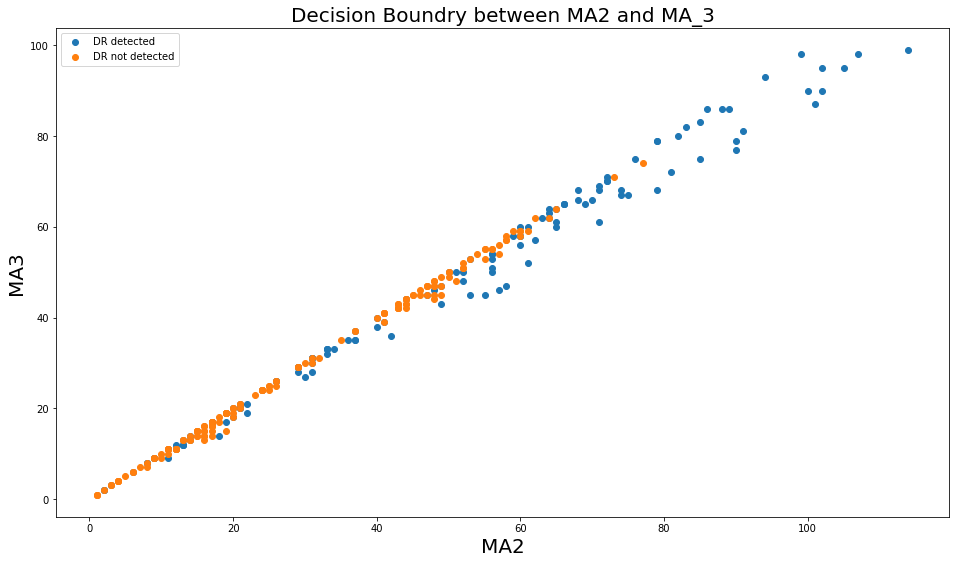

In [ ]:
x, y = clean_diabetic_df.iloc[:,:-1], clean_diabetic_df.iloc[:,-1]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]


diabetic_knn = KNN_model(K = 15)

diabetic_knn.fit(x_train,y_train)

y_pred, knns, prob = diabetic_knn.predict(x_test)

C1_x_scatter = x_test.loc[y_pred.eq(1)]['MA_2']
C1_y_scatter = x_test.loc[y_pred.eq(1)]['MA_3']

C0_x_scatter = x_test.loc[y_pred.eq(0)]['MA_2']
C0_y_scatter = x_test.loc[y_pred.eq(0)]['MA_3']

plt.figure()

plt.scatter(C1_x_scatter, C1_y_scatter, label = "DR detected" ,marker='o', alpha=1)
plt.scatter(C0_x_scatter, C0_y_scatter, label = "DR not detected" ,marker='o', alpha=1)

plt.title("Decision Boundry between MA2 and MA_3", fontsize=20)
plt.xlabel("MA2", fontsize=20)
plt.ylabel("MA3", fontsize=20)
plt.legend()

plt.show()

### Decison Boundries for Decision Tree on Hepatits dataset

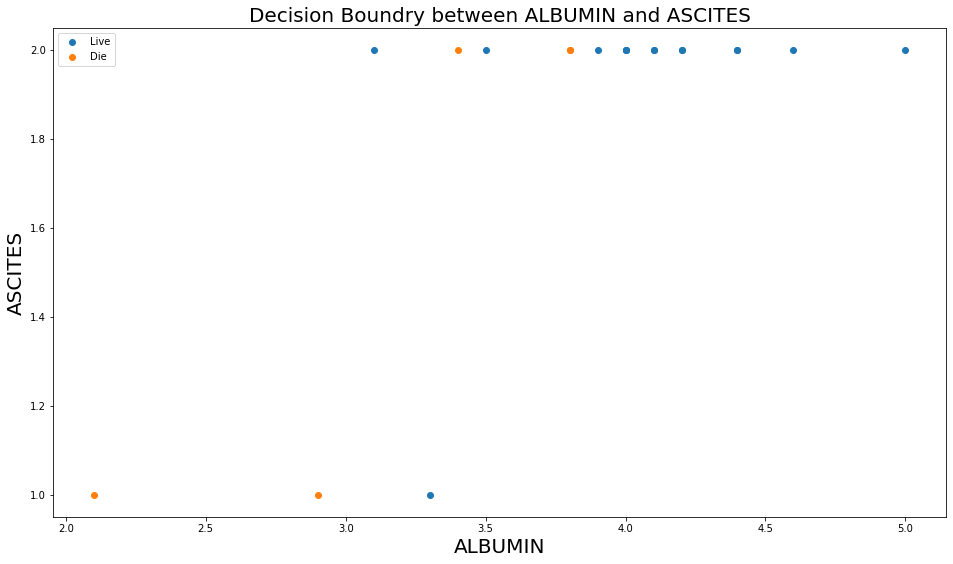

In [ ]:
clean_hepatitis_np = clean_hepatitis_df.to_numpy()

x, y = clean_hepatitis_np[:,1:], clean_hepatitis_np.astype(int)[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)

inds = np.random.permutation(num_instances)

#train-test split

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

tree = DecisionTree(max_depth=20)

probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)


C1_x_scatter = x_test[y_pred==2][:,16]
C1_y_scatter = x_test[y_pred ==2][:,11]

C0_x_scatter = x_test[y_pred==1][:,16]
C0_y_scatter =  x_test[y_pred ==1][:,11]

plt.figure()

plt.scatter(C1_x_scatter, C1_y_scatter, label = "Live" ,marker='o', alpha=1)
plt.scatter(C0_x_scatter, C0_y_scatter, label = "Die" ,marker='o', alpha=1)

plt.title("Decision Boundry between ALBUMIN and ASCITES", fontsize=20)
plt.xlabel("ALBUMIN", fontsize=20)
plt.ylabel("ASCITES", fontsize=20)
plt.legend()

plt.show()

### Decison Boundries for Decision Tree on Diabetic dataset

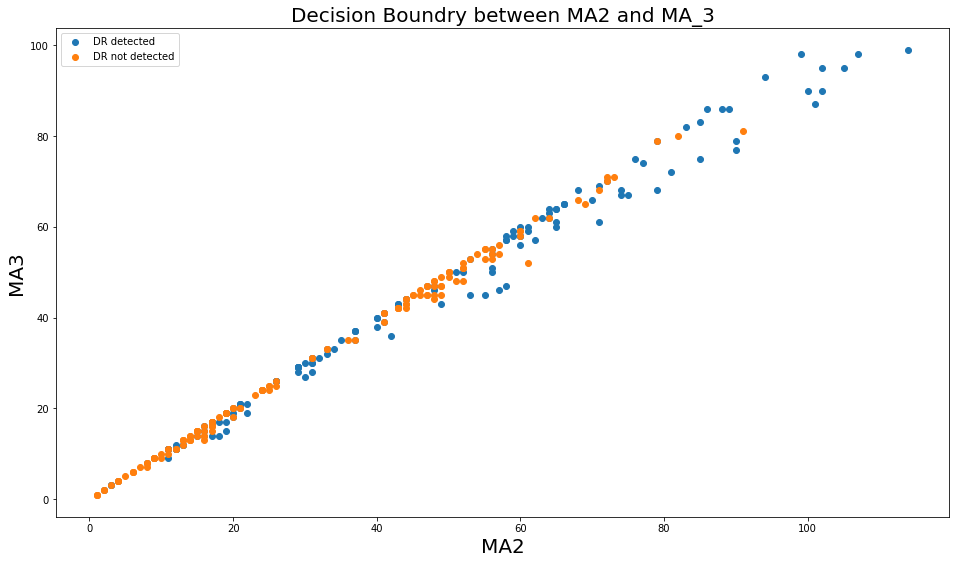

In [ ]:
clean_diabetic_np = clean_diabetic_df.to_numpy()


x, y = clean_diabetic_np[:,:-1], clean_diabetic_np.astype(int)[:,-1] 

np.random.seed(npseed)

(num_instances, num_features), num_classes = x.shape, y.shape

inds = np.random.permutation(num_instances)

#train-test split
num_train_instances = 864    # 75% train, 25% test split

x_train, y_train = x[inds[:num_train_instances]], y[inds[:num_train_instances]]
x_test, y_test = x[inds[num_train_instances:]], y[inds[num_train_instances:]]

tree = DecisionTree(max_depth=20)

probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)

C1_x_scatter = x_test[y_pred==1][:,2]
C1_y_scatter = x_test[y_pred==1][:,3]

C0_x_scatter = x_test[y_pred==0][:,2]
C0_y_scatter = x_test[y_pred==0][:,3]


plt.figure()

plt.scatter(C1_x_scatter, C1_y_scatter, label = "DR detected" ,marker='o', alpha=1)
plt.scatter(C0_x_scatter, C0_y_scatter, label = "DR not detected" ,marker='o', alpha=1)

plt.title("Decision Boundry between MA2 and MA_3", fontsize=20)
plt.xlabel("MA2", fontsize=20)
plt.ylabel("MA3", fontsize=20)
plt.legend()

plt.show()

## Above and Beyond
###Finding Correlation

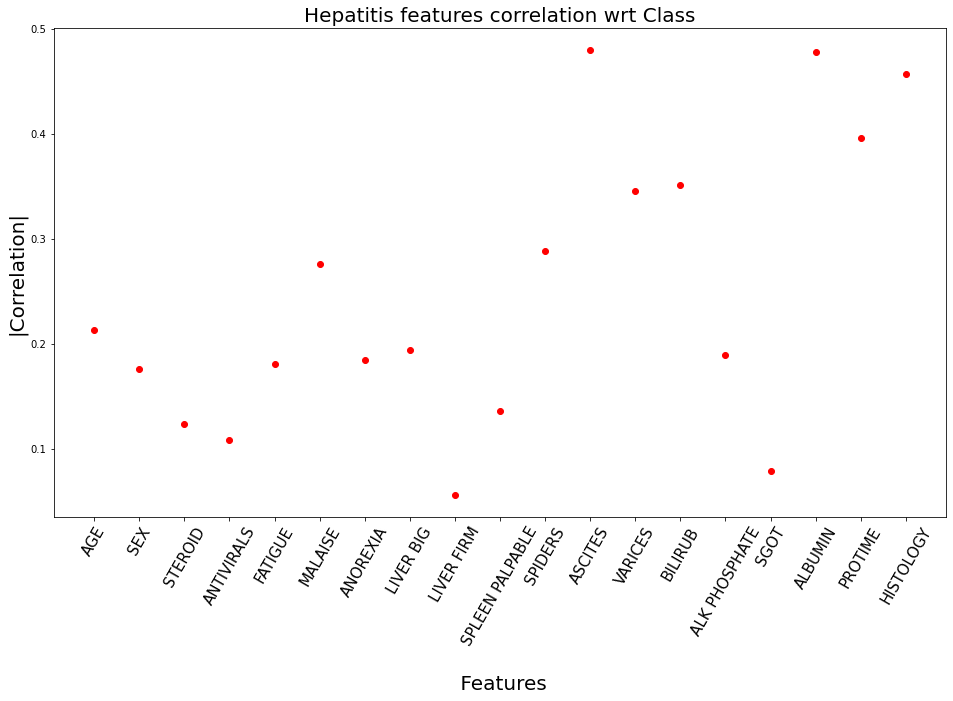

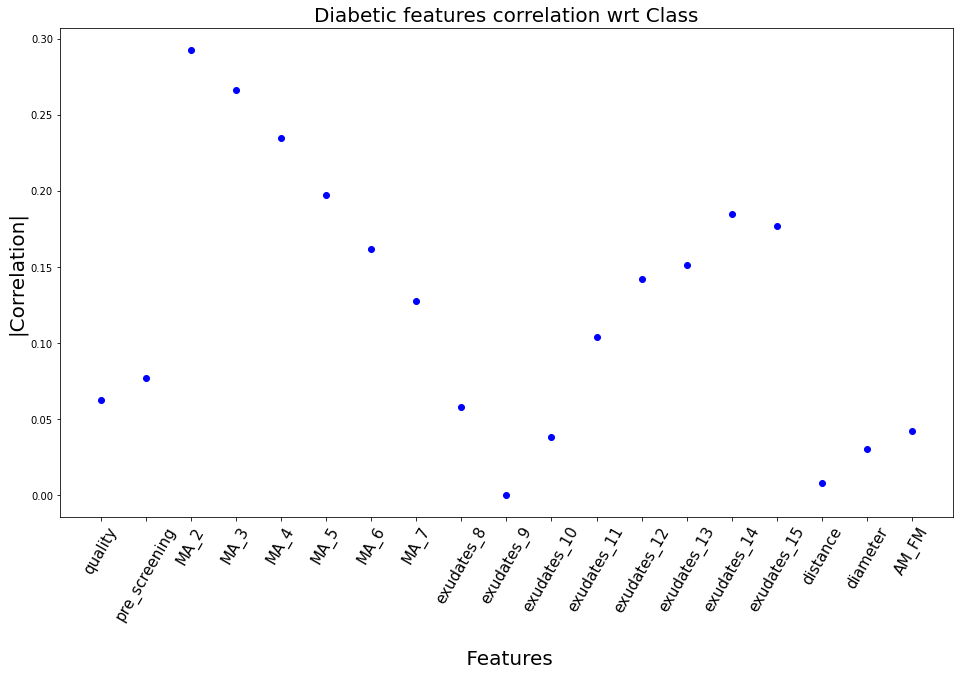

In [ ]:
hepatitis_features_correlations = abs(clean_hepatitis_df.corr().iloc[0,1:])

plt.figure()
plt.plot(hepatitis_features_correlations,  'ro')
plt.title("Hepatitis features correlation wrt Class", fontsize=20)
plt.xlabel(" \n Features", fontsize=20)
plt.ylabel("|Correlation|", fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xticks(rotation=60)
plt.rcParams['figure.figsize'] = [16, 9]

plt.show()

diabetic_features_correlations = abs(clean_diabetic_df.corr().iloc[-1,:-1])

plt.figure()

plt.plot(diabetic_features_correlations,  'bo')
plt.title("Diabetic features correlation wrt Class", fontsize=20)
plt.xlabel(" \n Features", fontsize=20)
plt.ylabel("|Correlation|", fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xticks(rotation=60)
plt.rcParams['figure.figsize'] = [16, 9]


plt.show()


###Approach 1: Inverse Feature Weighted KNN

In [ ]:

class KNN_model_with_inverse_feature_weighing():

  eculidean = lambda X1, X2 : X1.sub(X2).pow(2).sum(axis = 1).pow(0.5)
  weighted_eculidean = lambda X1, X2,weights : X1.sub(X2).pow(2).mul(weights).sum(axis = 1).pow(0.5)

  def __init__(self, K=1, dist= "eculidean"):
        self.K = K
        if dist == 'eculidean':
          self.dist_fn = KNN_model_with_inverse_feature_weighing.eculidean
               
  def fit(self, X: pd.core.frame.DataFrame, Y: pd.core.frame.DataFrame, weights):
    self.X  = X
    self.Y = Y
    self.weights = weights

  def predict(self, X_test):
    
    predictions = {}  # for an instance in X_tests, store {index : class with highest probalility} 
    knns = {}         # for an instance in X_tests, store {index : knns}
    probabilities = {}   # for an instance in X_tests, store {index : probablity of each classes}
    
    for index, X in X_test.iterrows():
    
      distances = self.dist_fn(self.X, X)                 # df stores distance of X from each instace in train data
      weighted_distance = KNN_model_with_inverse_feature_weighing.weighted_eculidean(self.X,X,self.weights)
      distances = weighted_distance
      sorted_nieghbours = distances.sort_values()         # the train instances are sorted based on their distances
      K_neighbours = sorted_nieghbours.index[:self.K]     # choose the K nearest train instances
      K_neighbours_labels = self.Y.loc[K_neighbours]      # Get the class of the K nearest train instances
      prob = (K_neighbours_labels.value_counts()/self.K)  # Similar to np.bincount, lists the probabilties of K labels in desc order
      prediction = prob.index[0]                          # The first instance would have the highest prob because of desc order

      predictions[index] = prediction
      knns[index] = K_neighbours_labels
      probabilities[index] = prob
      #prediction = K_neighbours_labels.mode().iloc[0]
        
    return  pd.Series(predictions) , pd.DataFrame.from_dict(knns,orient = 'index'), pd.DataFrame.from_dict(probabilities,orient = 'index')

def knn_accurancy(target_labels, true_labels):
  assert len(target_labels) == len(true_labels), "target and true labels must have equal len"
  difference = target_labels.compare(true_labels)
  return 1- len(difference)/len(target_labels)



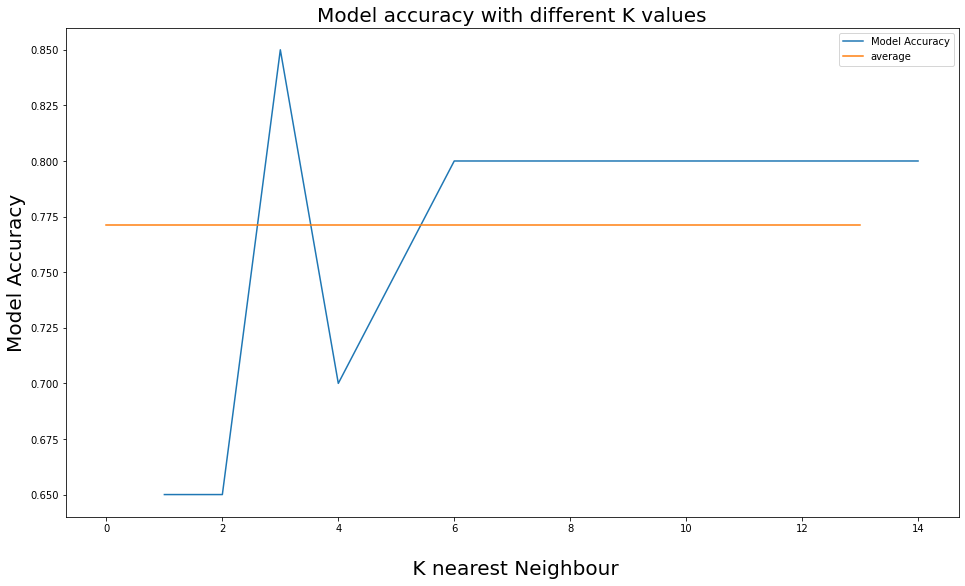

Model is optimum for K = 3 with accuracy = 85.00 %
Average accuracy = 77.14


In [ ]:
hepatits_weights = 1/hepatitis_features_correlations
x, y = clean_hepatitis_df.iloc[:,1:], clean_hepatitis_df.iloc[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)
inds = np.random.permutation(num_instances)

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]

K_accurancy = {}

for i in range(1,15):

  hepatitis_knn = KNN_model_with_inverse_feature_weighing(K=i)
  hepatitis_knn.fit(x_train,y_train, weights=hepatits_weights)
  y_pred, knns, prob = hepatitis_knn.predict(x_test)

  accuracy = knn_accurancy(y_pred,y_test)
  K_accurancy[i] = accuracy

plt.figure()

x_data = list(K_accurancy.keys())
y_data = list(K_accurancy.values())

y_mean = [np.mean(y_data) for i in x_data]

plt.plot( x_data, y_data, label = 'Model Accuracy')
plt.plot(y_mean, label = 'average')

plt.title("Model accuracy with different K values", fontsize=20)
plt.xlabel(" \n K nearest Neighbour", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')
plt.rcParams['figure.figsize'] = [16, 9]

plt.show()

print(f"Model is optimum for K = {np.argmax(y_data)+1} with accuracy = {100*max(y_data):.2f} %")
print(f"Average accuracy = {100*np.mean(y_data):.2f}")



### Approach 2 :Inverse Weighted KNN

In [ ]:
class Inverse_weighted_KNN_model():

  eculidean = lambda X1, X2 : X1.sub(X2).pow(2).sum(axis = 1).pow(0.5)
  manhattan = lambda X1, X2 : X1.sub(X2).abs().sum(axis=1)
  cosine =    lambda X1, X2 : X1.apply(lambda row: X2.dot(row) / np.linalg.norm(X2) / np.linalg.norm(row), axis=1)

  def __init__(self, K=1, dist= "eculidean"):
        self.K = K
        if dist == "manhatten":
          self.dist_fn = KNN_model.manhattan
        elif dist == 'eculidean':
          self.dist_fn = KNN_model.eculidean
        elif dist == 'cosine':
          self.dist_fn = KNN_model.cosine
        
  def fit(self, X: pd.core.frame.DataFrame, Y: pd.core.frame.DataFrame):
    self.X  = X
    self.Y = Y

  def predict(self, X_test):
    
    predictions = {}  # for an instance in X_tests, store {index : class with highest probalility} 
    knns = {}         # for an instance in X_tests, store {index : knns}
    probabilities = {}   # for an instance in X_tests, store {index : probablity of each classes}
    
    for index, X in X_test.iterrows():
    
      distances = self.dist_fn(self.X, X)                 # df stores distance of X from each instace in train data
      sorted_nieghbours = distances.sort_values()         # the train instances are sorted based on their distances
      K_neighbours = sorted_nieghbours.index[:self.K]     # choose the K nearest train instances
      K_neighbours_labels = self.Y.loc[K_neighbours]      # Get the class of the K nearest train instances
      
      weights = np.arange(self.K-1,-1,-1)
      for w in range(self.K):
        K_neighbours_labels = K_neighbours_labels.append( pd.Series([K_neighbours_labels.iloc[w] for _ in range(weights[w])] ) , ignore_index = True)
      prob = (K_neighbours_labels.value_counts()/K_neighbours_labels.value_counts().sum())  # Similar to np.bincount, lists the probabilties of K labels in desc order
      prediction = prob.index[0]                          # The first instance would have the highest prob because of desc order
   
      predictions[index] = prediction
      knns[index] = K_neighbours_labels
      probabilities[index] = prob
      
        
    return  pd.Series(predictions) , pd.DataFrame.from_dict(knns,orient = 'index'), pd.DataFrame.from_dict(probabilities,orient = 'index')

def knn_accurancy(target_labels, true_labels):
  assert len(target_labels) == len(true_labels), "target and true labels must have equal len"
  difference = target_labels.compare(true_labels)
  return 1- len(difference)/len(target_labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


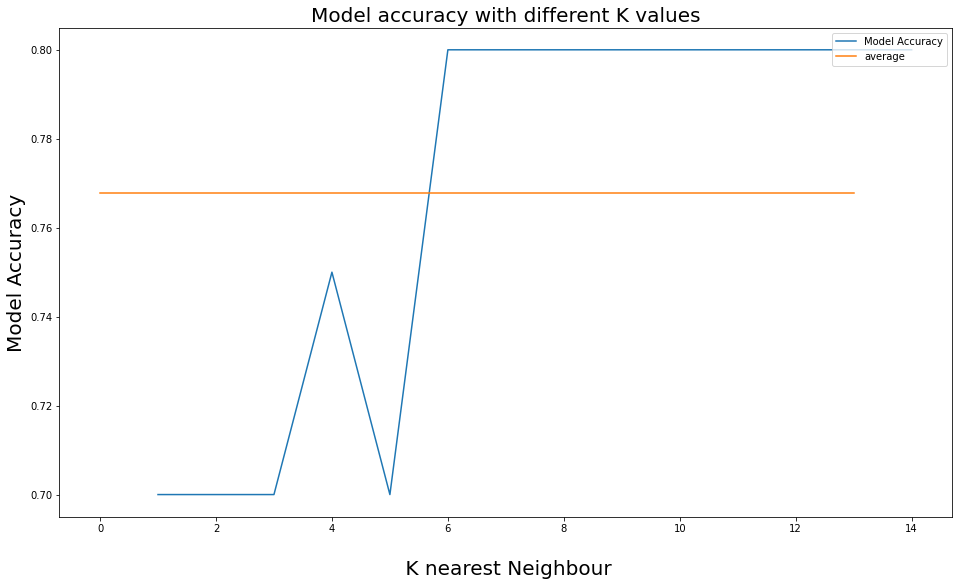

Model is optimum for K = 6 with accuracy = 80.00 %
Average accuracy = 76.79


In [ ]:
x, y = clean_hepatitis_df.iloc[:,1:], clean_hepatitis_df.iloc[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)
inds = np.random.permutation(num_instances)

num_train_instances = 60    # 75% train, 25% test split

x_train, y_train = x.iloc[inds[:num_train_instances],:], y.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[num_train_instances:],:], y.iloc[inds[num_train_instances:]]

K_accurancy = {}

for i in range(1,15):

  hepatitis_knn = Inverse_weighted_KNN_model(K=i)
  hepatitis_knn.fit(x_train,y_train)
  y_pred, knns, prob = hepatitis_knn.predict(x_test)

  accuracy = knn_accurancy(y_pred,y_test)
  K_accurancy[i] = accuracy

plt.figure()

x_data = list(K_accurancy.keys())
y_data = list(K_accurancy.values())
y_mean = [np.mean(y_data) for i in x_data]

plt.plot( x_data, y_data, label = 'Model Accuracy')
plt.plot(y_mean, label = 'average')

plt.title("Model accuracy with different K values", fontsize=20)
plt.xlabel(" \n K nearest Neighbour", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.rcParams['figure.figsize'] = [16, 9]

plt.show()

print(f"Model is optimum for K = {np.argmax(y_data)+1} with accuracy = {100*max(y_data):.2f} %")
print(f"Average accuracy = {100*np.mean(y_data):.2f}")


### Approach 3: Augmenting Dataset

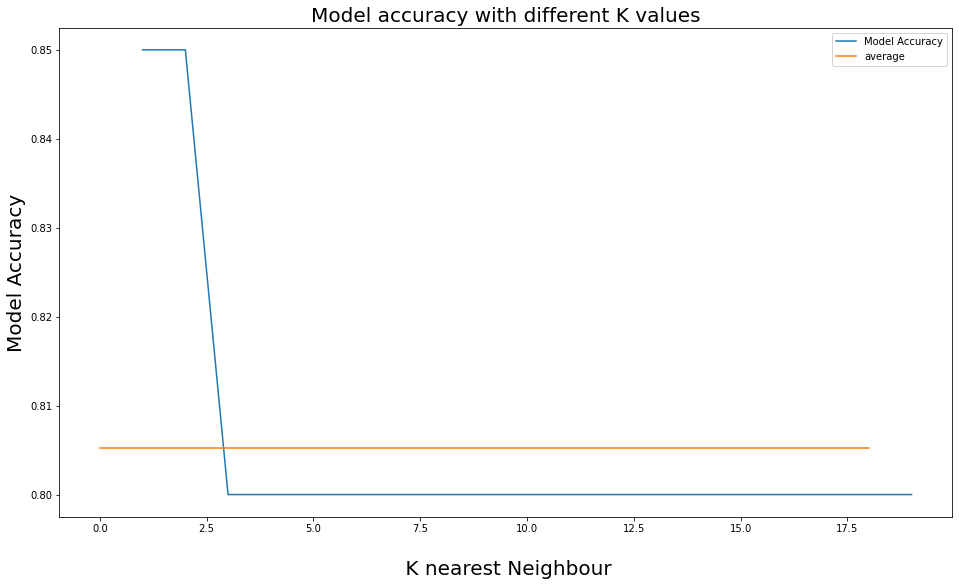

Model is optimum for K = 1 with accuracy = 85.00 %
Average accuracy = 80.53


In [ ]:
replaced_hepatitis_df = hepatitis_df.replace("?", np.nan).astype(float)

replaced_hepatitis_df = replaced_hepatitis_df.fillna(replaced_hepatitis_df.median())

#replaced_hepatitis_df.reset_index(drop=True, inplace=True)

#print(replaced_hepatitis_df.shape)

x_aug, y_aug = replaced_hepatitis_df.iloc[:,1:], replaced_hepatitis_df.iloc[:,0]
x, y = clean_hepatitis_df.iloc[:,1:], clean_hepatitis_df.iloc[:,0]

(num_instances, num_features), num_classes = x.shape, y.shape

np.random.seed(npseed)
inds = np.random.permutation(num_instances)
num_train_instances = 120    # 75% train, 25% test split

x_train, y_train = x_aug.iloc[inds[:num_train_instances],:], y_aug.iloc[inds[:num_train_instances]]
x_test, y_test = x.iloc[inds[60:],:], y.iloc[inds[60:]]

K_accurancy = {}

for i in range(1,20):

  hepatitis_knn = KNN_model(K=i)
  hepatitis_knn.fit(x_train,y_train)
  y_pred, knns, prob = hepatitis_knn.predict(x_test)

  accuracy = knn_accurancy(y_pred,y_test)
  K_accurancy[i] = accuracy

plt.figure()

x_data = list(K_accurancy.keys())
y_data = list(K_accurancy.values())
y_mean = [np.mean(y_data) for i in x_data]

plt.plot( x_data, y_data, label = 'Model Accuracy')
plt.plot(y_mean, label = 'average')

plt.title("Model accuracy with different K values", fontsize=20)
plt.xlabel(" \n K nearest Neighbour", fontsize=20)
plt.ylabel("Model Accuracy", fontsize=20)
plt.legend(loc='upper right')

plt.rcParams['figure.figsize'] = [16, 9]

plt.show()
print(f"Model is optimum for K = {np.argmax(y_data)+1} with accuracy = {100*max(y_data):.2f} %")
print(f"Average accuracy = {100*np.mean(y_data):.2f}")